In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [5]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [6]:
drinks.groupby('continent').beer_servings.describe()
# the data is unstacked by default

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [7]:
# use stack() to create a multilevel indexed DataFrame
drinks.groupby('continent').beer_servings.describe().stack()

continent           
Africa         count     53.000000
               mean      61.471698
               std       80.557816
               min        0.000000
               25%       15.000000
               50%       32.000000
               75%       76.000000
               max      376.000000
Asia           count     44.000000
               mean      37.045455
               std       49.469725
               min        0.000000
               25%        4.250000
               50%       17.500000
               75%       60.500000
               max      247.000000
Europe         count     45.000000
               mean     193.777778
               std       99.631569
               min        0.000000
               25%      127.000000
               50%      219.000000
               75%      270.000000
               max      361.000000
North America  count     23.000000
               mean     145.434783
               std       79.621163
               min        1.000000

In [8]:
df = pd.DataFrame({'name': ['A', 'A', 'B', 'B'], 'day': [1,2,1,2], 'weight': [100,103,130,129], 'height':[67,68,72,72]})
df

,name,day,weight,height
0,A,1,100,67
1,A,2,103,68
2,B,1,130,72
3,B,2,129,72


In [9]:
# create multilevel indexed DataFrame
df.set_index(['name','day'])

weight  height
name day                
A    1       100      67
     2       103      68
B    1       130      72
     2       129      72

In [10]:
# to_panel() or to_frame() method has been deprecated for DataFrame. However, to_frame() is available for Series.
# df.set_index(['name','day']).to_frame()

<AxesSubplot:>

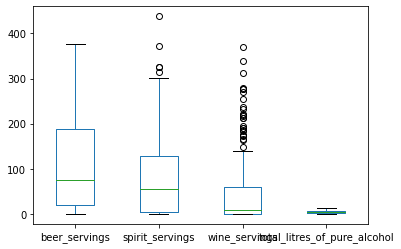

In [11]:
%matplotlib inline
drinks.plot(kind='box')

In [12]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [13]:
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [14]:
# similarly by using loc() method
movies.loc[movies.duration >= 200, :]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [15]:
movies.title[movies.duration >= 200]
# or movies[movies.duration >= 200].title
# 2 operations are involved

2                             The Godfather: Part II
7      The Lord of the Rings: The Return of the King
17                                     Seven Samurai
78                       Once Upon a Time in America
85                                Lawrence of Arabia
142                Lagaan: Once Upon a Time in India
157                               Gone with the Wind
204                                          Ben-Hur
445                             The Ten Commandments
476                                           Hamlet
630                                        Malcolm X
767                  It's a Mad, Mad, Mad, Mad World
Name: title, dtype: object

In [16]:
movies.loc[movies.duration >= 200, 'title']
# only 1 operation

2                             The Godfather: Part II
7      The Lord of the Rings: The Return of the King
17                                     Seven Samurai
78                       Once Upon a Time in America
85                                Lawrence of Arabia
142                Lagaan: Once Upon a Time in India
157                               Gone with the Wind
204                                          Ben-Hur
445                             The Ten Commandments
476                                           Hamlet
630                                        Malcolm X
767                  It's a Mad, Mad, Mad, Mad World
Name: title, dtype: object

In [17]:
a = drinks.continent.value_counts()

In [18]:
# parameter 'normalize=True' gives percentage of every value vs total count
b = drinks.continent.value_counts(normalize=True)

In [19]:
pd.concat([a,b], axis=1)

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


In [20]:
# unfavorable layout
pd.concat([a,b], axis=0)

Africa           53.000000
Europe           45.000000
Asia             44.000000
North America    23.000000
Oceania          16.000000
South America    12.000000
Africa            0.274611
Europe            0.233161
Asia              0.227979
North America     0.119171
Oceania           0.082902
South America     0.062176
Name: continent, dtype: float64

In [21]:
# sum for every column
drinks.sum(axis=0)

country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
continent                       AsiaEuropeAfricaEuropeAfricaNorth AmericaSouth...
dtype: object

In [22]:
# sum for every row
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
       ...  
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

In [23]:
# sum individual column
drinks.beer_servings.sum()

20489

In [24]:
# sum multiplel columns
drinks[['beer_servings', 'wine_servings']].sum()

beer_servings    20489
wine_servings     9544
dtype: int64

In [25]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [27]:
# create new columns and change data type to string
drinks[['beer', 'wine']] = drinks[['beer_servings', 'wine_servings']].astype(str)

In [28]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer,wine
0,Afghanistan,0,0,0,0.0,Asia,0,0
1,Albania,89,132,54,4.9,Europe,89,54
2,Algeria,25,0,14,0.7,Africa,25,14
3,Andorra,245,138,312,12.4,Europe,245,312
4,Angola,217,57,45,5.9,Africa,217,45


In [29]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
wine                             object
dtype: object

In [30]:
drinks['beer'].astype('float').describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

In [31]:
# effect the dtype change
drinks['beer'] = drinks['beer'].astype('float')

In [32]:
drinks['beer'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

In [33]:
# imitate vlookup function in Excel
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [34]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [35]:
mapping = {'R': 'no kids', 'PG-13': 'yes', "PG": 'yes'}

In [36]:
# map() method
movies.content_rating.map(mapping)

0      no kids
1      no kids
2      no kids
3          yes
4      no kids
        ...   
974        yes
975        yes
976        yes
977        yes
978    no kids
Name: content_rating, Length: 979, dtype: object

In [37]:
mapping2 = pd.DataFrame({'rating': ['R', 'PG-13', 'PG'], 'kids': ['no','yes','yes']})
mapping2.set_index('rating')

,kids
rating,
R,no
PG-13,yes
PG,yes


In [38]:
pd.merge(movies, mapping2, left_on='content_rating', right_on='rating')

,star_rating,title,content_rating,genre,duration,actors_list,rating,kids
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,no
3,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,no
4,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",R,no
...,...,...,...,...,...,...,...,...
767,7.4,Manhattan Murder Mystery,PG,Comedy,104,"[u'Woody Allen', u'Diane Keaton', u'Jerry Adler']",PG,yes
768,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay...",PG,yes
769,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",PG,yes
770,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",PG,yes


In [39]:
ufo.shape

(18241, 5)

In [40]:
# use iloc to slice
ufo.iloc[:-30, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18206,Cerrilillo,NaN,NaN,NM,2000-12-28 11:00:00
18207,Mansfield,NaN,FLASH,TX,2000-12-28 12:00:00
18208,Murphreesboro,NaN,FLASH,TN,2000-12-28 12:15:00
18209,Houston,NaN,LIGHT,TX,2000-12-28 17:09:00


In [41]:
ufo.dtypes
# 'Time' column already in datetime dtype during dataset importation

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [42]:
ufo.Time.dt.year.head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [43]:
# convert value to string dtype
ufo['Year'] = ufo.Time.dt.year.astype(str)

In [44]:
ufo.Time.dt.month

0         6
1         6
2         2
3         6
4         4
         ..
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: int64

In [45]:
# convert value to string dtype
ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0')

0        06
1        06
2        02
3        06
4        04
         ..
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: object

In [46]:
# returns the month names of the DateTimeIndex
ufo.Time.dt.month_name()

0            June
1            June
2        February
3            June
4           April
           ...   
18236    December
18237    December
18238    December
18239    December
18240    December
Name: Time, Length: 18241, dtype: object

In [47]:
ufo['Month'] = ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0')

In [48]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04


In [49]:
# to combine 2 strings (Year and Month)
# use str.cat() method to concatinate 2 strings, add '-' as separator
ufo['yyyy-mm'] = ufo.Year.str.cat(ufo.Month, sep='-')

In [50]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,yyyy-mm
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04,1933-04


In [51]:
ufo['yyyy-mm'].head()
# dtype maintains as object

0    1930-06
1    1930-06
2    1931-02
3    1931-06
4    1933-04
Name: yyyy-mm, dtype: object

In [52]:
ufo.Time.head()

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

In [53]:
# alternatively, use dt,to_period(), parameter (freq='M') for month
# dtype changes to period
ufo.Time.dt.to_period(freq='M')

0        1930-06
1        1930-06
2        1931-02
3        1931-06
4        1933-04
          ...   
18236    2000-12
18237    2000-12
18238    2000-12
18239    2000-12
18240    2000-12
Name: Time, Length: 18241, dtype: period[M]

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train['young_male'] = ((train.Sex == 'male') & (train.Age < 30)).map({True: 'yes', False: 'no'})
train.head()
# need not to create a 'for loop' to iterate every row
# set condition(s) instead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


In [56]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [57]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,yyyy-mm
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04,1933-04


In [58]:
ufo.City.isna().sum()
# 25 rows where the City value are missing

25

In [59]:
ufo.loc[(ufo.City.isna()) & (ufo['Colors Reported'] == 'RED'), :]

,City,Colors Reported,Shape Reported,State,Time,Year,Month,yyyy-mm
3123,NaN,RED,TRIANGLE,WV,1975-11-25 23:00:00,1975,11,1975-11
12441,NaN,RED,FIREBALL,WA,1998-10-26 17:58:00,1998,10,1998-10


In [60]:
ufo.loc[(ufo.City.isna()) & (ufo['Colors Reported'] == 'RED'), 'City'] = 'new_value'

In [61]:
ufo[ufo['City'] == 'new_value']

,City,Colors Reported,Shape Reported,State,Time,Year,Month,yyyy-mm
3123,new_value,RED,TRIANGLE,WV,1975-11-25 23:00:00,1975,11,1975-11
12441,new_value,RED,FIREBALL,WA,1998-10-26 17:58:00,1998,10,1998-10


In [62]:
# %timeit runs 3 times and provide runtime value
%timeit ufo.Time.dt.to_period(freq='M')

865 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
# %time runs 1 time, then provides runtime value and result
%time ufo.Time.dt.to_period(freq='M')

Wall time: 2 ms


0        1930-06
1        1930-06
2        1931-02
3        1931-06
4        1933-04
          ...   
18236    2000-12
18237    2000-12
18238    2000-12
18239    2000-12
18240    2000-12
Name: Time, Length: 18241, dtype: period[M]

In [64]:
# use string function str.len() to obtain length of individual element by row
ufo['city_len'] = ufo.City.str.len()

In [65]:
ufo['city_len'].head()

0     6.0
1    11.0
2     7.0
3     7.0
4    20.0
Name: city_len, dtype: float64

In [66]:
drinks2 = pd.read_csv('http://bit.ly/drinksbycountry')

In [67]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [68]:
drinks == drinks2

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
188,True,True,True,True,True,True
189,True,True,True,True,True,True
190,True,True,True,True,True,True
191,True,True,True,True,True,True


In [70]:
drinks2.iloc[0,0] = 'something else'

In [72]:
# checking how many cases are different
(drinks != drinks2).sum()

country                         1
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [76]:
# use isin() method to do multiple filtering at particulat column
drinks2[drinks2.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,something else,0,0,0,0.0,Asia
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
...,...,...,...,...,...,...
186,Uzbekistan,25,101,8,2.4,Asia
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [75]:
# the symbol '~' means NOT
drinks2[~drinks2.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,Europe
184,USA,249,158,84,8.7,North America
185,Uruguay,115,35,220,6.6,South America
187,Vanuatu,21,18,11,0.9,Oceania


In [78]:
# filtering more than 1 column
drinks2[(drinks2.continent.isin(['Asia', 'Africa'])) & (drinks2.beer_servings > 200)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
4,Angola,217,57,45,5.9,Africa
62,Gabon,347,98,59,8.9,Africa
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
159,South Africa,225,76,81,8.2,Africa


In [81]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [82]:
drinks.continent.describe()

count        193
unique         6
top       Africa
freq          53
Name: continent, dtype: object

In [85]:
# create new column, if continent is 'Asia', value=1, else value=0
(drinks2.continent == 'Asia').astype(int)

0      1
1      0
2      0
3      0
4      0
      ..
188    0
189    1
190    1
191    0
192    0
Name: continent, Length: 193, dtype: int32

In [86]:
((drinks2.continent == 'Asia') | (drinks2.continent == 'Europe')).astype(int)

0      1
1      1
2      0
3      1
4      0
      ..
188    0
189    1
190    1
191    0
192    0
Name: continent, Length: 193, dtype: int32